In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# 空間フィルタリング

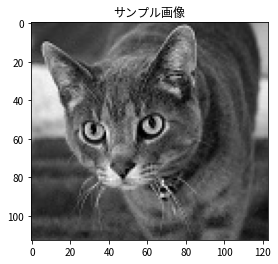

In [22]:
# 画像の読み込み
img1 = cv2.imread("sample1.jpg", cv2.COLOR_BGR2RGB)

plt.figure(facecolor="white")
plt.imshow(img1)
plt.title("サンプル画像")
plt.show()

## 平均化フィルタ

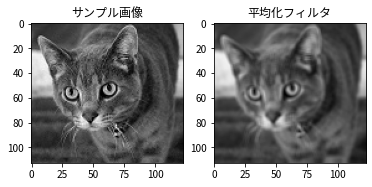

In [23]:
av_filter1 = np.array([[1/9,1/9,1/9],
                      [1/9,1/9,1/9],
                      [1/9,1/9,1/9]],np.float32)

av_filter2 = np.array([[ 1/25,1/25,1/25,1/25,1/25,],
                      [ 1/25,1/25,1/25,1/25,1/25,],
                      [ 1/25,1/25,1/25,1/25,1/25,],
                      [ 1/25,1/25,1/25,1/25,1/25,],
                      [ 1/25,1/25,1/25,1/25,1/25,]], np.float32)

result = cv2.filter2D(img1, -1, av_filter1)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("サンプル画像")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("平均化フィルタ")
plt.show()

## ガウシアンフィルタ

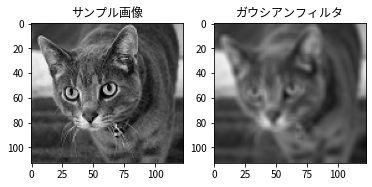

In [25]:
result = cv2.GaussianBlur(img1, (5, 5), 3)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("サンプル画像")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("ガウシアンフィルタ")
plt.show()

## エッジ検出器

## Prewitt filter

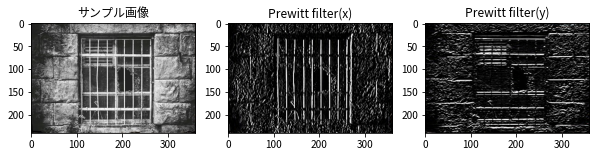

In [29]:
img2 = cv2.imread("sample2.jpg", cv2.COLOR_BGR2RGB)

filter_x= np.array([[-1,0,1],
                      [-1,0,1],
                      [-1,0,1]],np.float32)

filter_y= np.array([[-1,-1,-1],
                      [0,0,0],
                      [1,1,1]],np.float32)

result_x = cv2.filter2D(img2, -1, filter_x)
result_y = cv2.filter2D(img2, -1, filter_y)

plt.figure(facecolor="white",figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img2)
plt.title("サンプル画像")

plt.subplot(1,3,2)
plt.imshow(result_x)
plt.title("Prewitt filter(x)")

plt.subplot(1,3,3)
plt.imshow(result_y)
plt.title("Prewitt filter(y)")
plt.show()

### Sobel filter

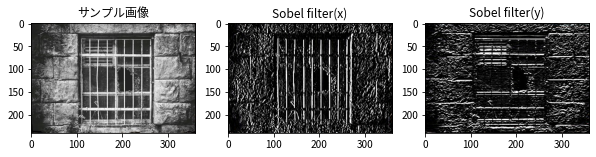

In [30]:
img2 = cv2.imread("sample2.jpg", cv2.COLOR_BGR2RGB)

filter_x= np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]],np.float32)

filter_y= np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]],np.float32)

result_x = cv2.filter2D(img2, -1, filter_x)
result_y = cv2.filter2D(img2, -1, filter_y)

plt.figure(facecolor="white",figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img2)
plt.title("サンプル画像")

plt.subplot(1,3,2)
plt.imshow(result_x)
plt.title("Sobel filter(x)")

plt.subplot(1,3,3)
plt.imshow(result_y)
plt.title("Sobel filter(y)")
plt.show()

## Laplacian of Gaussian filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Laplacian of Gaussian filter')

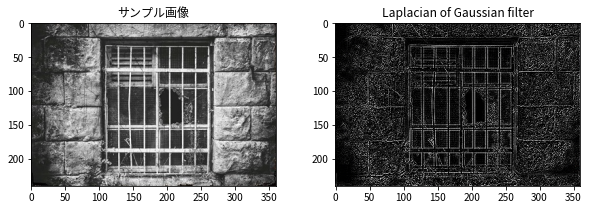

In [32]:
lap_fil = np.array([[0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]])

result = cv2.filter2D(img2,ddepth=cv2.CV_16S,kernel=lap_fil)

plt.figure(facecolor="white",figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title("サンプル画像")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Laplacian of Gaussian filter")

## Harris corner detector

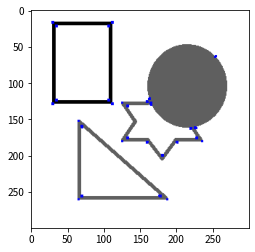

In [46]:
img3 = cv2.imread("sample3.jpg", cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img3[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img3)